In [1]:
import pandas as pd
import sklearn as sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Hospital500.csv',sep=';')

In [3]:
X=data.iloc[:,0:25]
y=data.iloc[:,25]

In [4]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [44]:
y_train

array([ 49.82290745,   4.87728597,  11.91487464,  19.75307803,
        23.60700003, -29.98278439,  -3.18275233,  81.61798896,
       -85.87627478,  66.296663  , -70.00907918, -25.41289672,
       -40.341885  , -50.80958638,  11.69850317, -26.06617118,
       -10.09289693, -16.81772822, -18.84474658, -37.62388016,
         6.90439112,  95.27998841,  14.08815923,  37.63961941,
        61.23802841,  -7.46245465,  42.37309217,  89.99454831,
        47.61800511,  14.11477091, -29.85246699, -19.3463247 ,
        27.69980617, -12.73102933,   4.69818239, -15.54546881,
        81.10896741, -42.73831876, -43.50103947, -13.81361736,
        55.72588193,   3.73964726,  35.17541383,  -4.68693299,
       -40.02555297, -54.23600024, -41.92953467,  37.56912025,
       -40.71853261,  43.95479823, -15.74495171, -42.13327197,
         2.38253778,   0.17626991,  12.60675473, -31.41170946,
       -29.41293009, -20.37016177,   3.09183413, -40.10546979,
       -26.63729755, -63.60114181, -66.77520312,  -8.00

In [5]:
from sklearn.preprocessing import StandardScaler   
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [8]:
X_train, y_train = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100,)

In [9]:
grid_param_rfr = {  
    'n_estimators': [50,100, 200],
    'random_state': [0,1,2],
    'max_depth': [2,3]
}

In [10]:
gd_sr_rfr = GridSearchCV(estimator=regr,  
                     param_grid=grid_param_rfr,
                     cv=5,
                     n_jobs=-1)

In [11]:
gd_sr_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200], 'random_state': [0, 1, 2], 'max_depth': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
best_parameters = gd_sr_rfr.best_params_  
print(best_parameters)

{'max_depth': 3, 'n_estimators': 50, 'random_state': 1}


In [13]:
best_result = gd_sr_rfr.best_score_  
print(best_result) 

0.8772616612953058


In [14]:
rfr1=RandomForestRegressor(max_depth=3, random_state=1,n_estimators=50,)

In [15]:
rfr2=rfr1.fit(X_train,y_train)

In [16]:
y_rfr=rfr2.predict(X_train)

In [17]:
#y_rfr

In [40]:
y_train

array([ 49.82290745,   4.87728597,  11.91487464,  19.75307803,
        23.60700003, -29.98278439,  -3.18275233,  81.61798896,
       -85.87627478,  66.296663  , -70.00907918, -25.41289672,
       -40.341885  , -50.80958638,  11.69850317, -26.06617118,
       -10.09289693, -16.81772822, -18.84474658, -37.62388016,
         6.90439112,  95.27998841,  14.08815923,  37.63961941,
        61.23802841,  -7.46245465,  42.37309217,  89.99454831,
        47.61800511,  14.11477091, -29.85246699, -19.3463247 ,
        27.69980617, -12.73102933,   4.69818239, -15.54546881,
        81.10896741, -42.73831876, -43.50103947, -13.81361736,
        55.72588193,   3.73964726,  35.17541383,  -4.68693299,
       -40.02555297, -54.23600024, -41.92953467,  37.56912025,
       -40.71853261,  43.95479823, -15.74495171, -42.13327197,
         2.38253778,   0.17626991,  12.60675473, -31.41170946,
       -29.41293009, -20.37016177,   3.09183413, -40.10546979,
       -26.63729755, -63.60114181, -66.77520312,  -8.00

In [19]:
r = {'nn': y_rfr}
y_pred_rfr = pd.DataFrame(r)
#y_pred_rfr

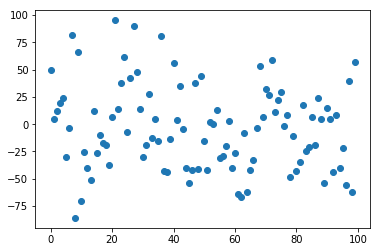

In [36]:
plt.plot(y_train, 'o')
plt.show()

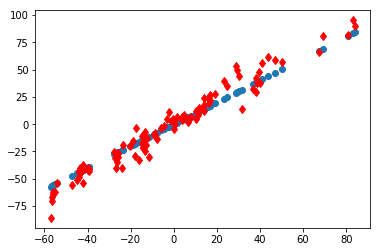

In [39]:
plt.plot(y_pred_rfr,y_pred_rfr,'o',y_pred_rfr,y_train,'rd')
plt.show()

# SVR

In [21]:
from sklearn.svm import SVR

In [22]:
svr = SVR()

In [23]:
grid_param_svr = {  
    'gamma':['scale','auto'],
    'epsilon': [0.1,0.2] ,  #con0.1 da linear y con 0.2 da sigmoid
    'kernel': ['rbf','linear','poly','sigmoid']
}

In [24]:
gd_sr_svr = GridSearchCV(estimator=svr,  
                     param_grid=grid_param_svr,
                     cv=5,
                     n_jobs=-1)

In [25]:
gd_sr_svr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.2], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
best_parameters = gd_sr_svr.best_params_  
print(best_parameters)

{'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [27]:
best_result = gd_sr_svr.best_score_  
print(best_result)

0.9999897549533106


In [28]:
svr1 = SVR(gamma='scale', epsilon=0.1, kernel='linear')

In [29]:
svr2=svr1.fit(X_train,y_train)

In [30]:
y_svr=svr2.predict(X_train)

In [31]:
#y_svr

In [32]:
#y_train

In [33]:
s = {'svr': y_svr}
y_pred_svr = pd.DataFrame(s)
#y_pred_svr

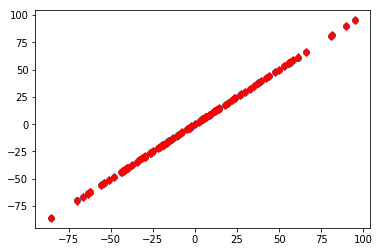

In [34]:
plt.plot(y_pred_svr,y_pred_svr,'o',y_pred_svr,y_train,'rd')
plt.show()

In [103]:
k=svr2.predict(X_test)

ValueError: X.shape[1] = 25 should be equal to 4, the number of features at training time

In [268]:
#gd_sr_svr.cv_results_